## importing all the basic libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [ ]:
# Loading the data

In [2]:
dataset=pd.read_csv("E:\Data science materials\Real_world_projects\pump\sensor.csv\sensor.csv")

In [19]:
df=dataset.copy()

In [20]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## EDA (Exploratory Data Analysis)

In [21]:
# checking null values
df.isnull().sum()/len(df)*100

Unnamed: 0          0.000000
timestamp           0.000000
sensor_00           4.633261
sensor_01           0.167484
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05           0.008624
sensor_06           2.177741
sensor_07           2.474129
sensor_08           2.317992
sensor_09           2.085603
sensor_10           0.008624
sensor_11           0.008624
sensor_12           0.008624
sensor_13           0.008624
sensor_14           0.009532
sensor_15         100.000000
sensor_16           0.014070
sensor_17           0.020879
sensor_18           0.020879
sensor_19           0.007262
sensor_20           0.007262
sensor_21           0.007262
sensor_22           0.018609
sensor_23           0.007262
sensor_24           0.007262
sensor_25           0.016340
sensor_26           0.009078
sensor_27           0.007262
sensor_28           0.007262
sensor_29           0.032680
sensor_30           0.118464
sensor_31           0.007262
sensor_32     

In [22]:
# sensor_5 and sensor_50 have more than 20% null values, so we have to drop it
# Unnamed :0 isjust a index column
# we have to drop delete sensor_00 and sensor_51 which are both missing close to 6-7% of their data
df=df.drop(['sensor_15','sensor_50','Unnamed: 0','sensor_00','sensor_51'],axis=1)

In [23]:
# to get more info
df.describe()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
count,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000
mean,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,...,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968
std,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,...,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598
min,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,...,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370
25%,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,...,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060
50%,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,...,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040
75%,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,47.463760,...,77.864580,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890
max,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,76.106860,...,512.760400,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700


In [24]:
df.shape

(220320, 50)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 50 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_16       220289 non-null  float64
 16  sensor_17       220274 non-null  float64
 17  sensor_18 

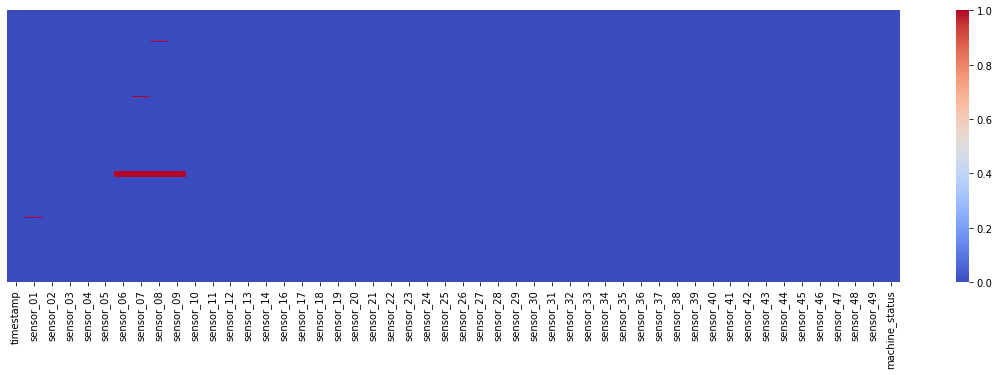

In [29]:
# visualisation for the null values 
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='coolwarm')
plt.show()

In [ ]:
# we still have some missing values around 2% of the data is still missing in sensor_06 sensor_07 
# sensor_08 sensor_09. This could have been caused by weather, electrical malfunction, 
# maintanence, or many other factors 
# we will impute the rest of the missing values.

In [ ]:
# we will split it into training and testing data using a 60/40 split. 
# And, since this is timeseries data and we want to predict on theoretically new data, 
# we will take the last 40% from the dataset as the testing data (new data). 
# We could split the data randomly into training and testing but 
# since we really want to try to predict failure in future, 
# we will study the first 60% (current history) and try to predict the last 40% (future). 
# Normally we wouldn't recommend such large percentages of values to be used in the testing data 
# (usually use around 20%) but in this instance, we have (we think) sufficient rows to train a model. 
# But, more importantly, we have 7 failures (BROKEN instance). We will put at least 2 in the testing 
# set to see if the model can detect them.

In [31]:
last_40percent = round(len(df) - len(df)*.4)
train_data=df.iloc[:last_40percent,:]# first 60% of the data for training
test_data=df.iloc[last_40percent:,:]# last 40% of the data for testing

In [32]:
print(train_data.shape)
print(test_data.shape)

(132192, 50)
(88128, 50)


In [35]:
test_data[test_data['machine_status']=='BROKEN']

,timestamp,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
141131,2018-07-08 00:11:00,45.138890,52.90799,45.35590,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,35.41666,32.81250,36.19791,37.32639,35.30093,38.19444,43.40278,99.53703,44.84954,BROKEN
166440,2018-07-25 14:00:00,45.833332,52.99479,43.88021,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,35.41666,36.45833,51.30208,52.10200,52.66204,67.12963,43.98148,230.32410,69.73380,BROKEN


## VISUALIZATION

In [42]:
# lets visualisation how many are noraml , broken and recovering
x_col=df.iloc[:,1:49]
normal_machine=df[df['machine_status']=='NORMAL']
broken_machine=df[df['machine_status']=='BROKEN']
recovering_machine=df[df['machine_status']=='RECOVERING']

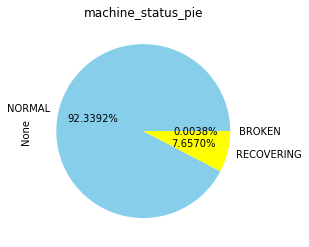

In [48]:
train_data.groupby('machine_status').size().plot(kind='pie',autopct='%.4f%%',
                                                  colors=['black','skyblue','yellow'])
plt.title("machine_status_pie")
plt.show()

In [49]:
# we can clearly see most of the time sensor is normal.
# We then see the RECOVERING as the next group, which also makes sense given that 
# the machine breaks then take a bit to recover. Lastly, only 0.004% of the data is in BROKEN status.
# This is okay because a machine breaks, and in theory, shouldn't be broken for very long.

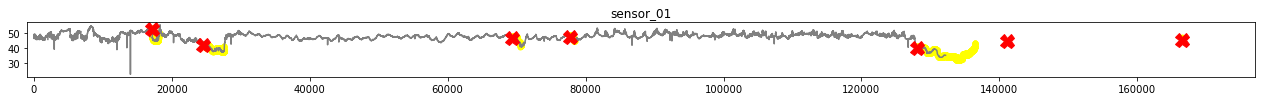

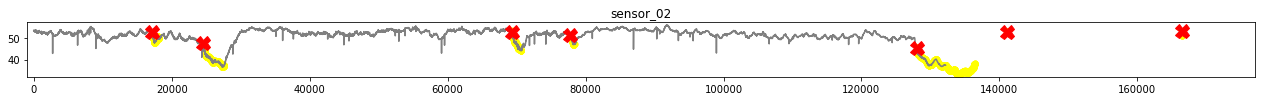

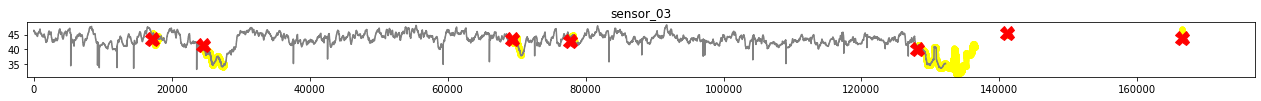

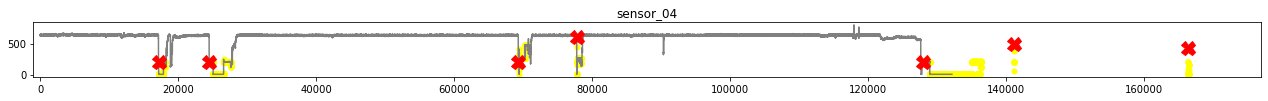

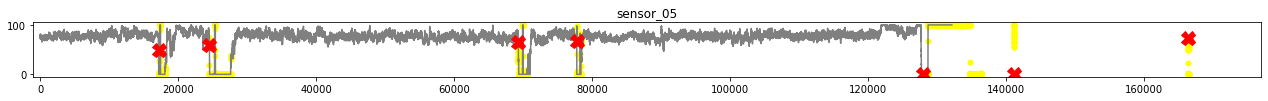

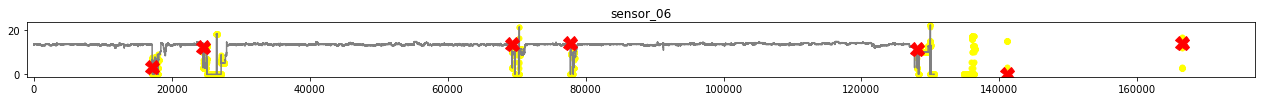

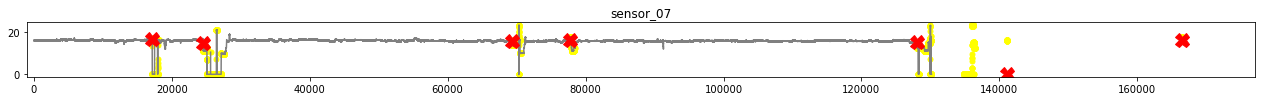

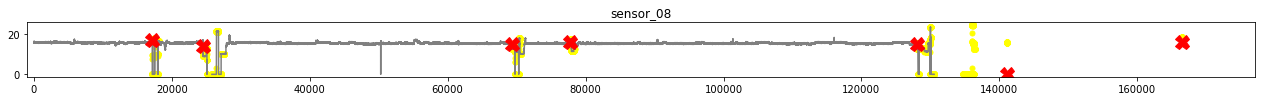

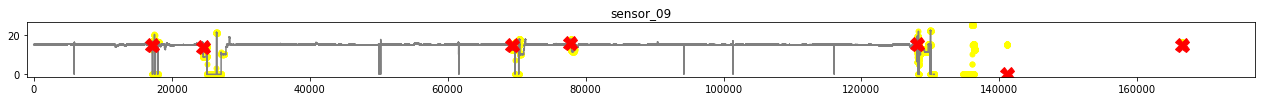

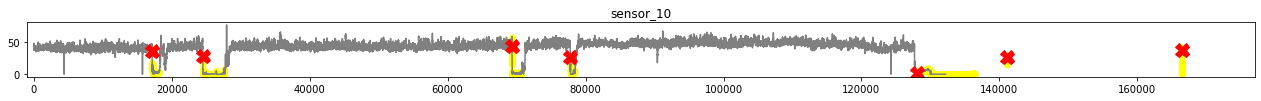

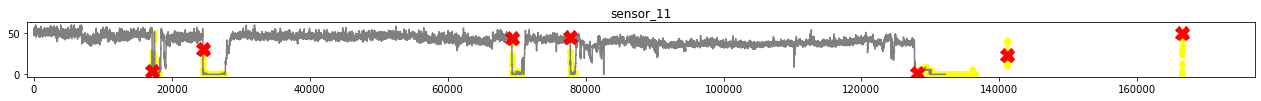

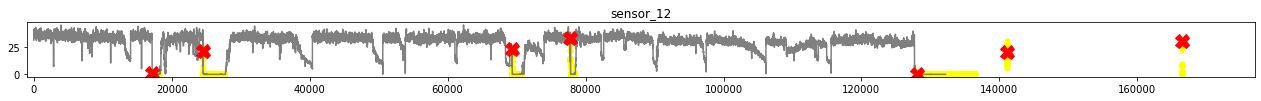

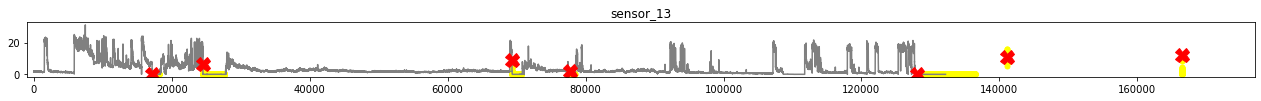

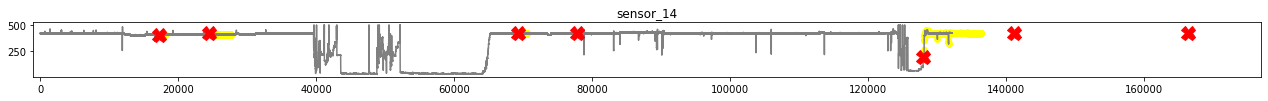

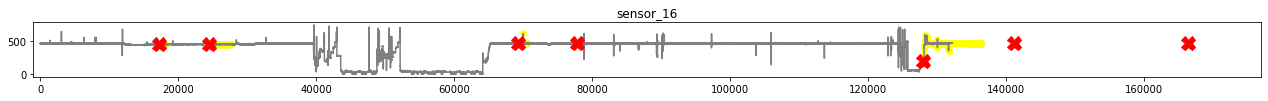

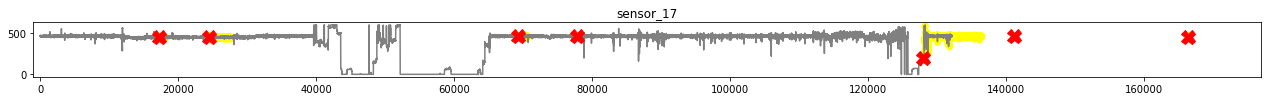

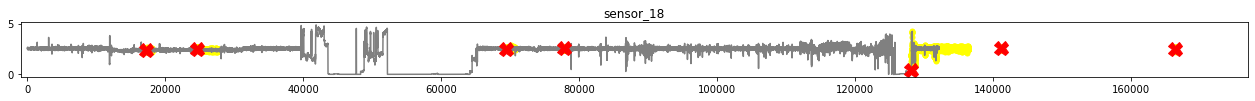

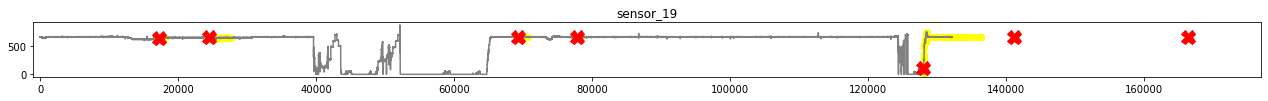

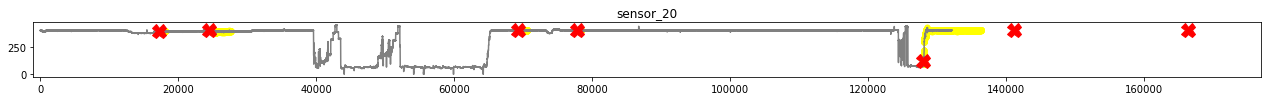

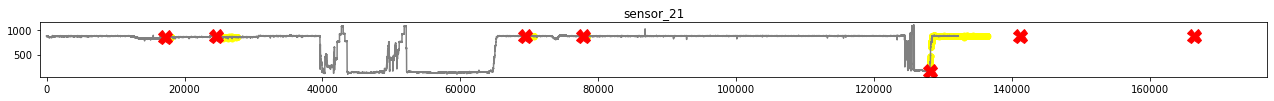

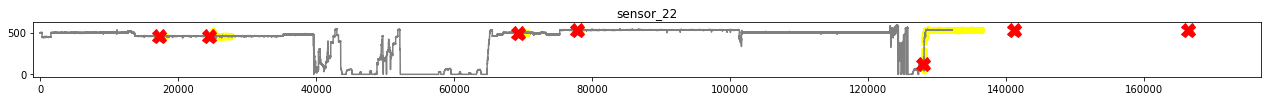

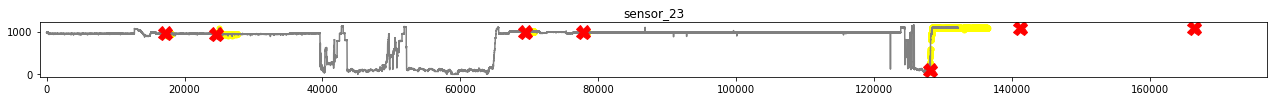

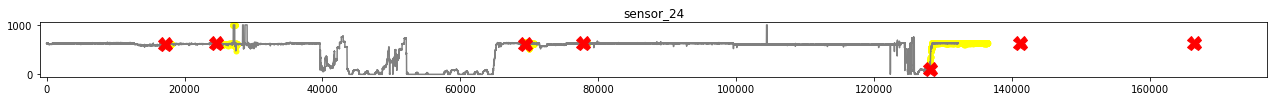

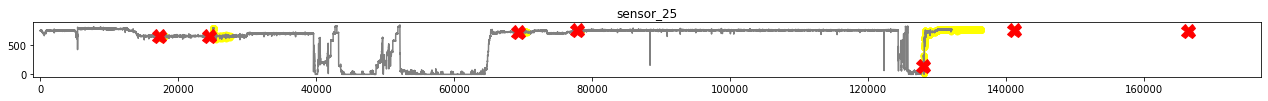

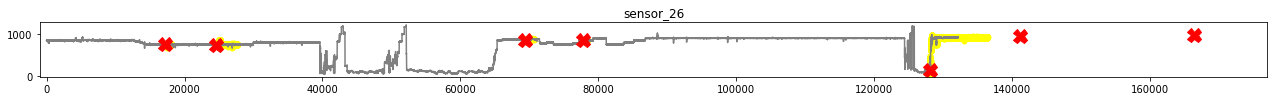

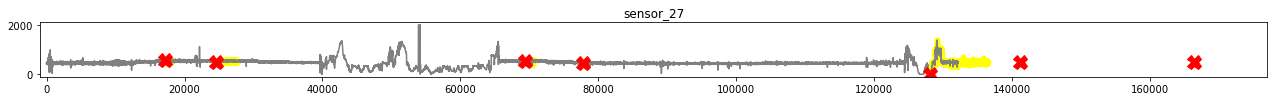

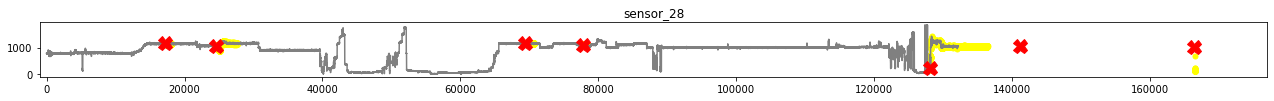

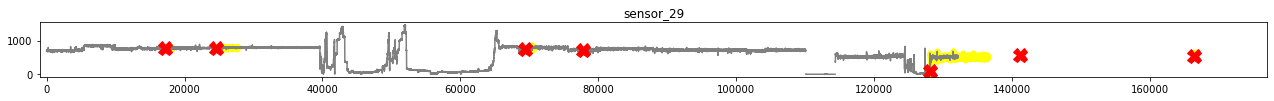

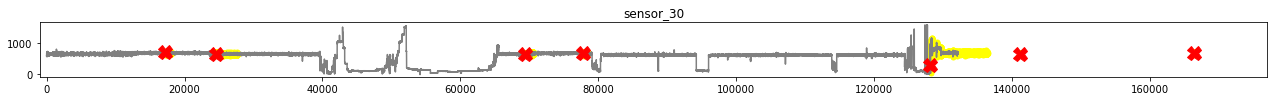

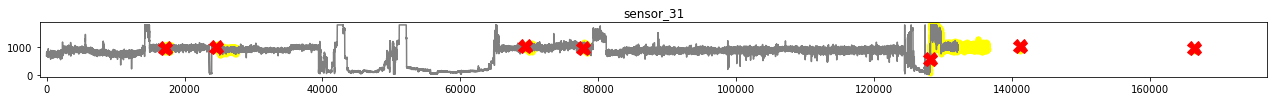

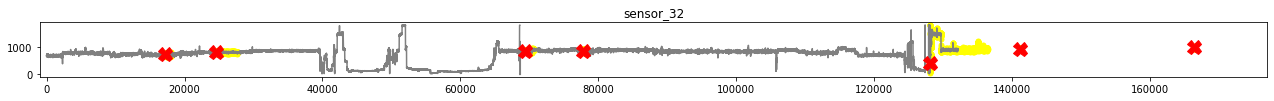

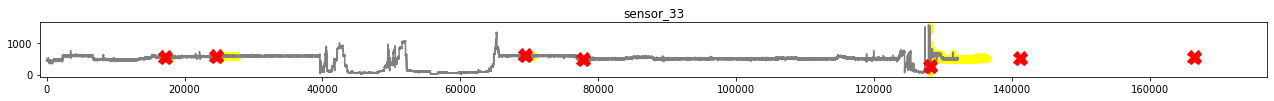

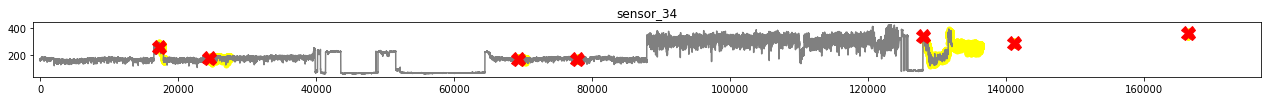

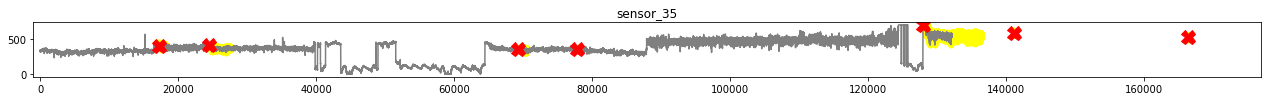

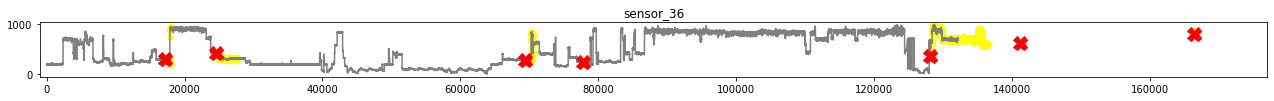

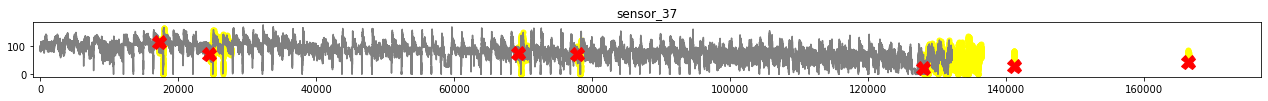

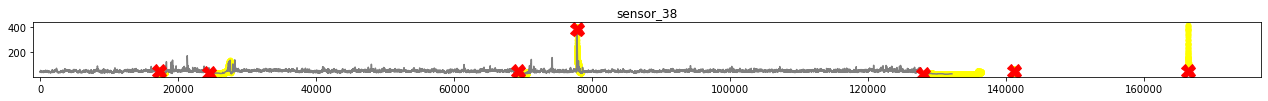

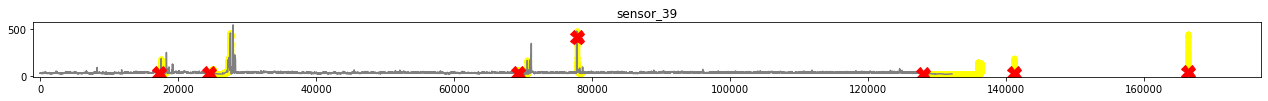

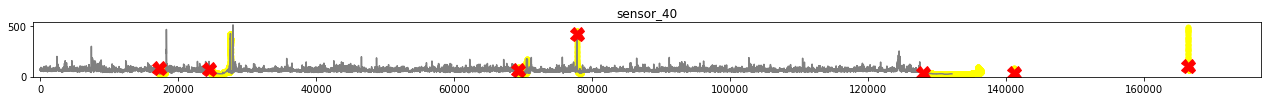

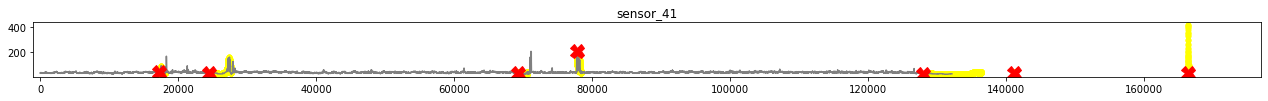

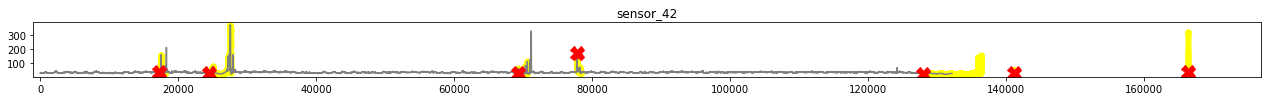

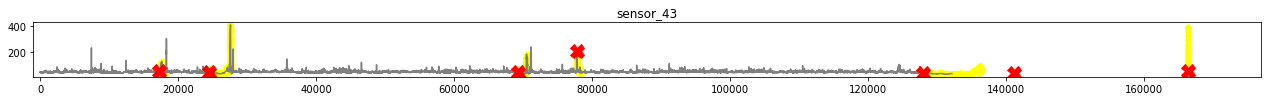

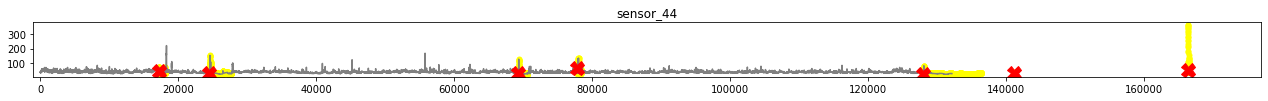

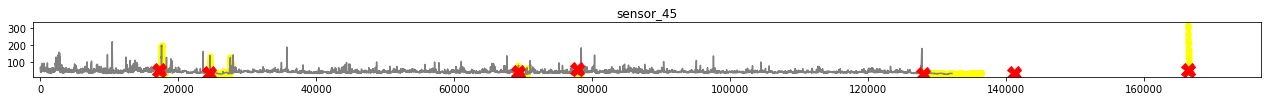

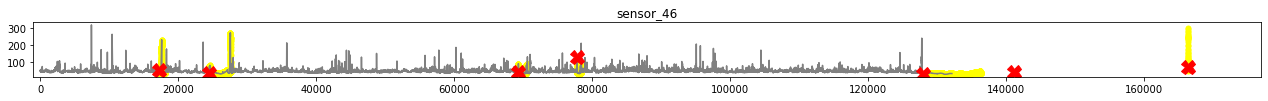

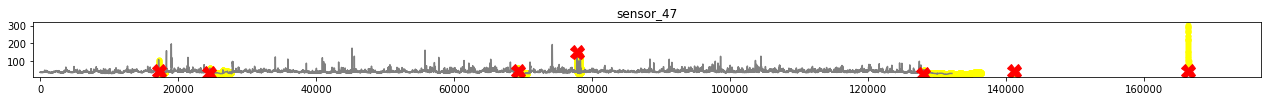

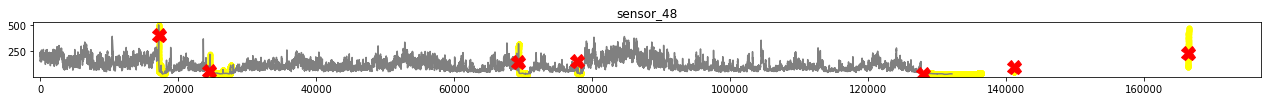

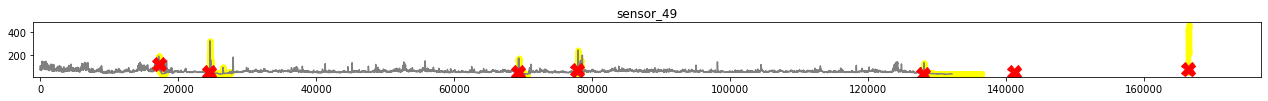

In [52]:
for sensor in x_col:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(recovering_machine[sensor], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(train_data[sensor], color='grey')
    plot = plt.plot(broken_machine[sensor], linestyle='none', marker='X', color='red', markersize=14)
    plot = plt.title(sensor)
    plt.xlim((-1000,177000))
    plt.show();

In [53]:
# As someone who does not know very much about water pumps and their sensors,
# we will look at these plots for patterns (as we should anyway).
# First, we see that many of the plots have large changes around the x-marker 40000-65000 time,
# as well as around 130000 time. Some sensors drop to very low values, some increase, 
# while others (which are normally consistent) flutter greatly. 
# We see that in these times the machine has failed and is recovering at least once.
# This could be an indictator for predicting failure. 
# This brings us to the next task: dealing with missing data.

## Preprocessing

In [54]:
# Steps for preprocessing this dataset:

# 1. Handle missing data with forward fill
# 2. Normalize
# 3. Dimensionalty reduction with PCA

In [65]:
X_cols=train_data.iloc[:,1:49].columns

In [66]:
X_cols

Index(['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21',
       'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26',
       'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31',
       'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36',
       'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41',
       'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46',
       'sensor_47', 'sensor_48', 'sensor_49'],
      dtype='object')

In [61]:
# split the data into X and y
X_train=train_data.iloc[:,1:49]
y_train=train_data['machine_status']

In [62]:
X_train.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
0,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834
1,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834
2,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963
3,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028
4,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093


In [63]:
# imputing the missing value
X_train = X_train.fillna(method='ffill')

In [67]:
# normalize data 
from sklearn.preprocessing import Normalizer
normalize = Normalizer()
X_train = normalize.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_cols

In [68]:
# The curse of dimensionality is a real problem in machine learning.
# I tried to run a covariance matrix on the training data but since the data is very large in shape, 
# the notebook ran out of memory and restarts. 
# To solve this, I could have used a larger notebook but instead, let's reduce the dimensionality of the data

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .99, svd_solver = 'full' )
pca.fit(X_train)
print(f'Number of components after reduction: {pca.n_components_}')

Number of components after reduction: 16


In [72]:
pca.explained_variance_

array([0.09629125, 0.00890455, 0.00644001, 0.0038204 , 0.00263758,
       0.00227281, 0.00158987, 0.00131147, 0.00112446, 0.00102644,
       0.00093835, 0.00073091, 0.00055499, 0.00045077, 0.00043499,
       0.00026746])

In [73]:
n_comps = pca.n_components_
most_important_comps = [np.abs(pca.components_[i]).argmax() for i in range(n_comps)]
intital_features = list(X_train.columns)
most_important_sensors = [intital_features[most_important_comps[i]] for i in range(n_comps)]
dic = {'PC{}'.format(i+1): most_important_sensors[i] for i in range(n_comps)}
df = pd.DataFrame(sorted(dic.items()))
print("Most Important Features") 
df

Most Important Features


,0,1
0,PC1,sensor_04
1,PC10,sensor_32
2,PC11,sensor_32
3,PC12,sensor_48
4,PC13,sensor_33
5,PC14,sensor_48
6,PC15,sensor_23
7,PC16,sensor_16
8,PC2,sensor_36
9,PC3,sensor_27


In [74]:
reduced_X_train = pca.transform(X_train)

In [75]:
reduced_X_train

array([[-0.12070787, -0.03375159, -0.13562177, ...,  0.00112656,
         0.00257942, -0.00621309],
       [-0.12070787, -0.03375159, -0.13562177, ...,  0.00112656,
         0.00257942, -0.00621309],
       [-0.11858719, -0.04500986, -0.12590016, ...,  0.00101636,
         0.00114318, -0.00342143],
       ...,
       [-0.28217032,  0.04874544,  0.09714861, ...,  0.0044605 ,
        -0.01280192, -0.00340593],
       [-0.28393501,  0.05055303,  0.08800099, ...,  0.00271796,
        -0.01579242, -0.00577908],
       [-0.28398853,  0.05044673,  0.08737049, ...,  0.00415378,
        -0.01525386, -0.00577743]])

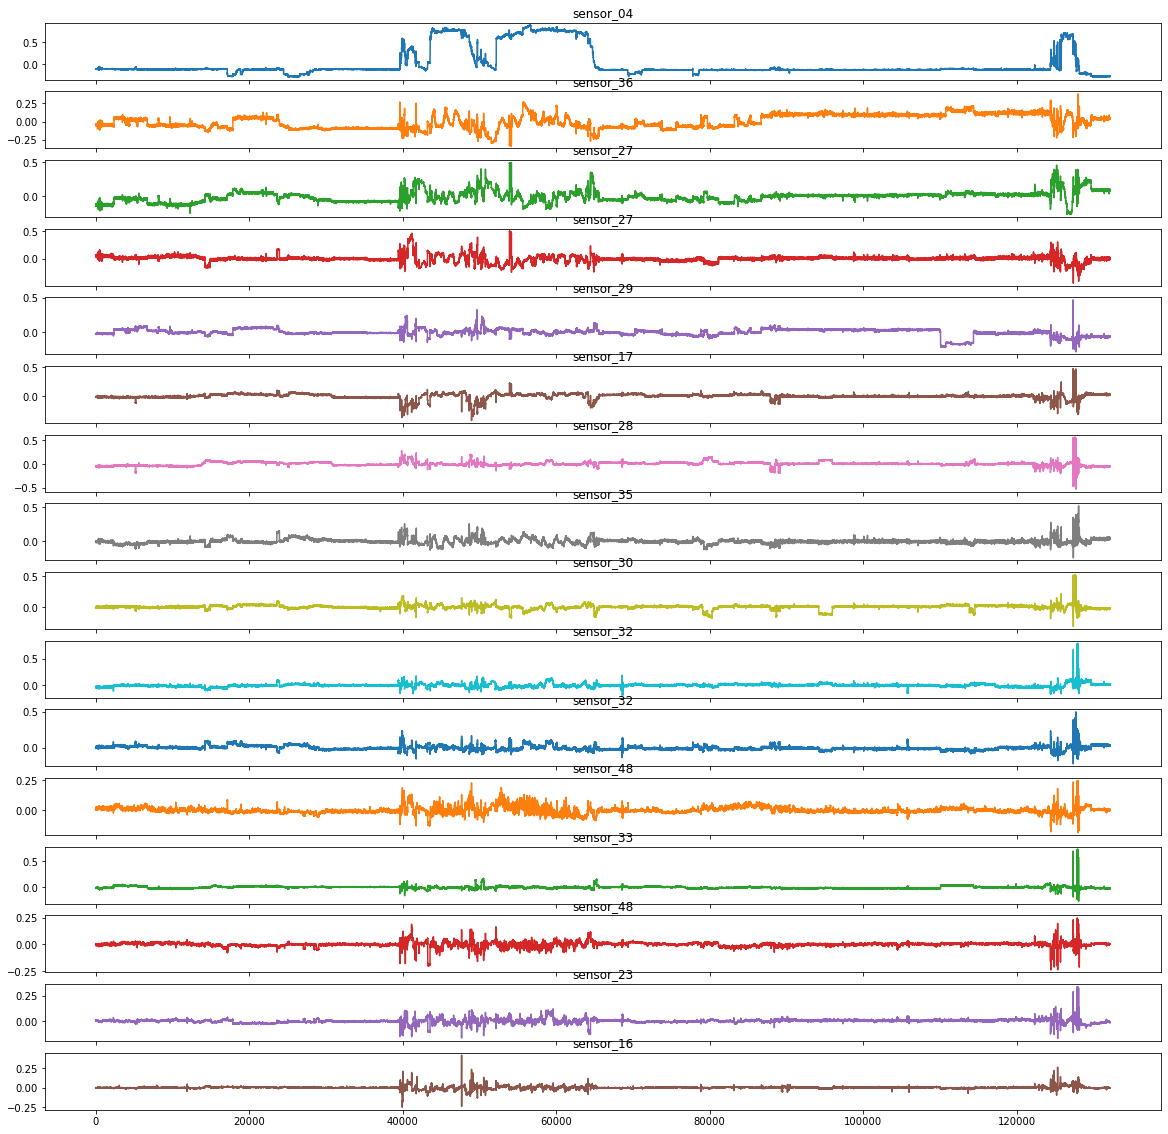

In [78]:
# replot the features we will use in the predictive model
pd.DataFrame(reduced_X_train).plot(subplots =True, 
                                   sharex = True, 
                                   figsize = (20,20),
                                   title = most_important_sensors, 
                                   legend = False);

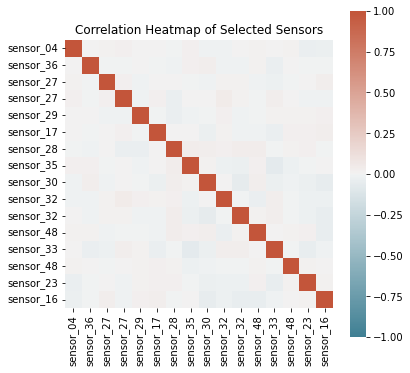

In [80]:
# Let's look below at the correlation between features which we will use in our model later.
plt.figure(figsize = (6,6))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap((pd.DataFrame(reduced_X_train).sample(n=10000, replace=True)).corr(), 
            square = True, cmap = cmap, vmin = -1, vmax = 1,
            yticklabels = most_important_sensors, xticklabels = most_important_sensors)
plt.title('Correlation Heatmap of Selected Sensors');

In [81]:
print('Covariance Matrix')
pd.DataFrame(reduced_X_train, columns=most_important_sensors).sample(n=10000, replace=True).cov()

Covariance Matrix


,sensor_04,sensor_36,sensor_27,sensor_27,sensor_29,sensor_17,sensor_28,sensor_35,sensor_30,sensor_32,sensor_32,sensor_48,sensor_33,sensor_48,sensor_23,sensor_16
sensor_04,0.097133,-0.000201,0.000443,4.897026e-04,-0.000048,0.000143,5.147276e-05,-0.000330,0.000102,0.000215,0.000004,-0.000081,-0.000073,-1.479516e-04,0.000085,-7.684394e-05
sensor_36,-0.000201,0.008832,0.000082,-7.363381e-05,0.000022,-0.000050,3.703057e-05,0.000026,0.000039,-0.000020,-0.000021,0.000012,-0.000005,3.427178e-05,0.000020,7.764670e-06
sensor_27,0.000443,0.000082,0.006587,1.425303e-04,0.000045,-0.000033,1.264920e-05,0.000024,-0.000053,-0.000044,0.000041,-0.000035,0.000016,-1.825269e-05,-0.000011,8.495333e-06
sensor_27,0.000490,-0.000074,0.000143,3.842144e-03,-0.000048,0.000058,-5.447137e-05,0.000022,-0.000023,0.000014,0.000019,0.000027,-0.000024,2.658645e-07,0.000003,1.284644e-05
sensor_29,-0.000048,0.000022,0.000045,-4.762440e-05,0.002568,0.000031,2.888780e-05,0.000018,0.000021,0.000006,0.000006,0.000003,-0.000002,4.753841e-06,-0.000003,-5.491065e-06
sensor_17,0.000143,-0.000050,-0.000033,5.759326e-05,0.000031,0.002336,-5.181989e-05,-0.000081,-0.000028,0.000009,0.000022,0.000009,0.000019,3.722766e-05,-0.000004,-1.370929e-05
sensor_28,0.000051,0.000037,0.000013,-5.447137e-05,0.000029,-0.000052,1.502478e-03,-0.000004,-0.000010,0.000032,0.000016,0.000011,-0.000013,1.064086e-05,0.000004,-9.755727e-07
sensor_35,-0.000330,0.000026,0.000024,2.243825e-05,0.000018,-0.000081,-3.850265e-06,0.001295,-0.000013,-0.000046,-0.000030,-0.000007,-0.000022,-2.887357e-05,-0.000023,7.205358e-06
sensor_30,0.000102,0.000039,-0.000053,-2.269983e-05,0.000021,-0.000028,-9.652775e-06,-0.000013,0.001114,0.000032,-0.000034,0.000006,0.000002,-9.622825e-06,-0.000003,-4.904581e-06
sensor_32,0.000215,-0.000020,-0.000044,1.433068e-05,0.000006,0.000009,3.204193e-05,-0.000046,0.000032,0.000922,0.000010,-0.000030,0.000010,-1.332912e-05,0.000003,-5.642629e-06


# Modelling

The reason we did not apply fillna(), Normalizer() and PCA on the whole dataset (training and test together)
is because that can lead to data leakage and impact the final results, 
and even cause false results. For this, we split first then apply separately.

In [99]:

X_test = test_data.iloc[:,1:49]
y_test = test_data['machine_status']
X_test = X_test.fillna(method='ffill')
normalize = Normalizer(copy=True)
X_test = normalize.fit_transform(X_test[most_important_sensors])

In [100]:
# We have preprocessed our data again to ensure a clean slate in the new model. 
# Now we'll use GridSearchCV with KNN to find the best parameters to use with this model.

## KNN model

In [102]:
# find best KNN using gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [3, 5, 10], 
             'weights': ['uniform', 'distance'], 
             'algorithm': ['ball_tree', 'kd_tree'], 
             'p': [1, 2]}
grid_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = parameters, 
                        cv = 3) 
grid_KNN.fit(reduced_X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [103]:
best_param = grid_KNN.best_params_
print("Best parameters:", best_param)

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [104]:
# KNN train best model
KNN = KNeighborsClassifier(n_neighbors = 5,
                          algorithm ='ball_tree',
                          p = 1, 
                          weights = 'uniform')
KNN.fit(reduced_X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', p=1)

In [114]:
# saving the model
model=KNN.fit(reduced_X_train, y_train)

In [112]:
# test thetraining set
y_pred_train=KNN.predict(reduced_X_train)

In [105]:
# test the testing set with KNN
ypred = KNN.predict(X_test)

In [106]:
# We now have a workable KNN model and its predictions. 

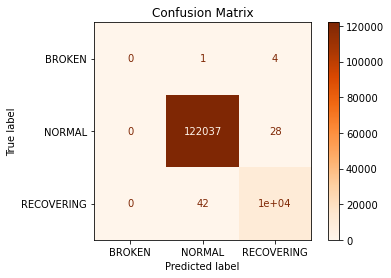

KNN Test Results
Train Accuracy: 0.9994
Train Precision: 0.9994
Train Recall: 0.9994


In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show();
acc = accuracy_score(y_train, y_pred_train)
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred_train, 
                                                                     zero_division=1, 
                                                                     average = 'micro')
print('KNN Test Results')
print('Train Accuracy:', round(acc, 4))
print('Train Precision:', round(precision, 4))
print('Train Recall:', round(recall, 4))

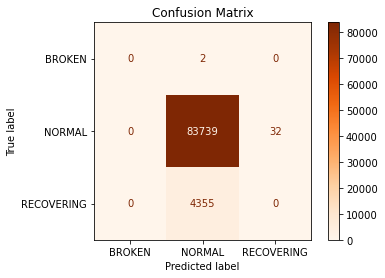

KNN Test Results
Test Accuracy: 0.9502
Test Precision: 0.9502
Test Recall: 0.9502


In [109]:
# show test statistics and results

conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, ypred, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show();
acc = accuracy_score(y_test, ypred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, ypred, 
                                                                     zero_division=1, 
                                                                     average = 'micro')
print('KNN Test Results')
print('Test Accuracy:', round(acc, 4))
print('Test Precision:', round(precision, 4))
print('Test Recall:', round(recall, 4))

# Conclusion and Future Suggestions 

Let's review what we did in this project. 
First we explored the data given to us and visualized it. 
It is suggested not to view all the data before splitting into testing and training sets but 
for learning experience and this project specifically, we decided to look at it all first. 
Then we visualized the data to get a better since of the patterns.
Next, we did data preprocessing by dealing with missing data with forward-fill propogation. 
We used PCA to find the most useful features (columns) to use when trainging the models."

WE trained the model using KNN supervised learning algorithm.
we compared the model performance for test and training data.

We saw in  the KNN models that the test accuracy, precision, and recall seemed quite good.
However, by understanding our data and investigating further, we know that is probably not the case. Our data was very unbalanced; almost all the data was labeled NORMAL, then we had some RECOVERING, and very few BROKEN instances. What this means for our models is that it had a hard time identifying anything other than NORMAL. This is important in real-life situations to be aware of. By just looking at the performance test results, we might have thought we got a fantastic model. But the truth is that we were not able to find a single BROKEN instance with the KNN  models.


Every project should recommend ways to enhance their work. For this project, I would recommend using more data with more variety. As said, this data was very unbalanced. Ways to do this would be to find more data, create more data, or even artificially create more data. Another recommendation would be to use different models other than KNN . Models which are more geared towards anomaly detection (such as a forest or SVM) or predictive maintanence algorthims (such as a regression model to find remaining useful life by using similiarity measures) could have done a better job than our presented models. Lastly, having more water pumps to compare to this pump may have helped the algorithms learn better.